# Imports

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor, SGDClassifier, ElasticNet 
from sklearn.svm import SVR


from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

### Data Quality

In [361]:
df = pd.read_csv('logicimmo - Complet.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
3643,417,6,4,9900000,75016,5,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3642,416,1,8,9375000,75116,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
2302,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,-1,1,-1,-1,-1
508,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,1,-1,-1,-1,-1
2301,393,8,3,9000000,75116,0,10,5,1,1,-1,-1,-1,1,-1,-1,-1
507,393,8,3,9000000,75116,0,10,5,1,1,1,-1,-1,1,-1,-1,-1
3641,265,6,2,7290000,75116,5,4,3,1,1,-1,-1,-1,-1,-1,-1,-1
3640,274,7,4,6950000,75007,4,10,-1,1,1,-1,-1,-1,-1,-1,-1,-1
3639,187,4,2,6600000,75008,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
3957,460,8,5,6500000,75116,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1


In [362]:
print(max(y))

9900000


Text(0, 0.5, 'prix')

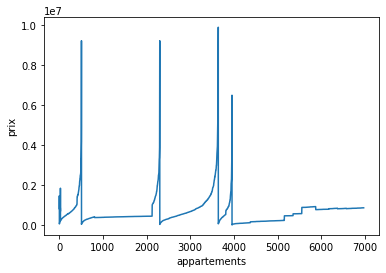

In [363]:
ax = df['Prix (Euros)'].plot()
ax.set_xlabel("appartements")
ax.set_ylabel("prix")

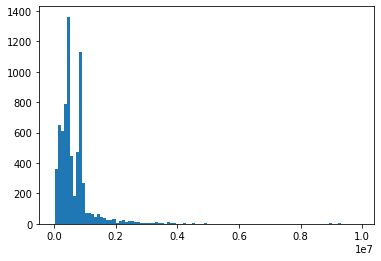

In [364]:
plt.hist(y, bins=100)
plt.show()
#histogramme des prix -> certains atteignent les 9 900 000 €

Pour éviter que les valeurs extrèmes biaisent le modèle, on ne les prend pas en compte.

In [365]:
compteur = 0
for prix in y :
    if prix > 2000000 :
        compteur += 1
        df.drop(df[df['Prix (Euros)'] == prix].index, inplace = True)

print("Nombre de biens supprimés : ",compteur)

X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

Nombre de biens supprimés :  224


,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
2251,168,6,4,2000000,75009,0,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3536,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,-1,-1,-1,-1,-1
2250,188,7,4,1990000,75016,4,10,3,1,1,1,1,1,1,-1,-1,-1
2249,133,5,3,1990000,75016,0,1,2,1,1,1,-1,1,1,-1,-1,-1
2248,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,1,1,-1,-1,-1
462,133,5,3,1990000,75016,0,1,2,1,1,-1,-1,1,1,-1,-1,-1
461,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
460,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,-1,1,-1,-1,-1
3535,138,5,3,1984000,75008,2,10,5,1,1,-1,-1,-1,-1,-1,-1,-1
3937,156,1,5,1980000,75005,6,10,2,1,1,-1,-1,-1,-1,-1,-1,-1


In [366]:
df.shape

(6751, 17)

In [367]:
df.isnull().sum()

Superficie (m2)       0
Nombre Pieces         0
Nombre Chambres       0
Prix (Euros)          0
Code Postal           0
Classe Energetique    0
Nombre Photos         0
Etage                 0
Type de Bien          0
Type Vendeur          0
Terrasse              0
Parking               0
Cave                  0
Ascenseur             0
Gardien               0
Renove                0
Box                   0
dtype: int64

In [368]:
df.duplicated().sum()
#Pas de variable ID_appartement => Pas nécessairement des doublons, justes des appartements avec les mêmes données

1039

In [369]:
df['Type de Bien'].value_counts()
#Uniquement des appartements

1    6751
Name: Type de Bien, dtype: int64

In [370]:
df['Type Vendeur'].value_counts()
#Uniquement des vendeurs Pro

1    6751
Name: Type Vendeur, dtype: int64

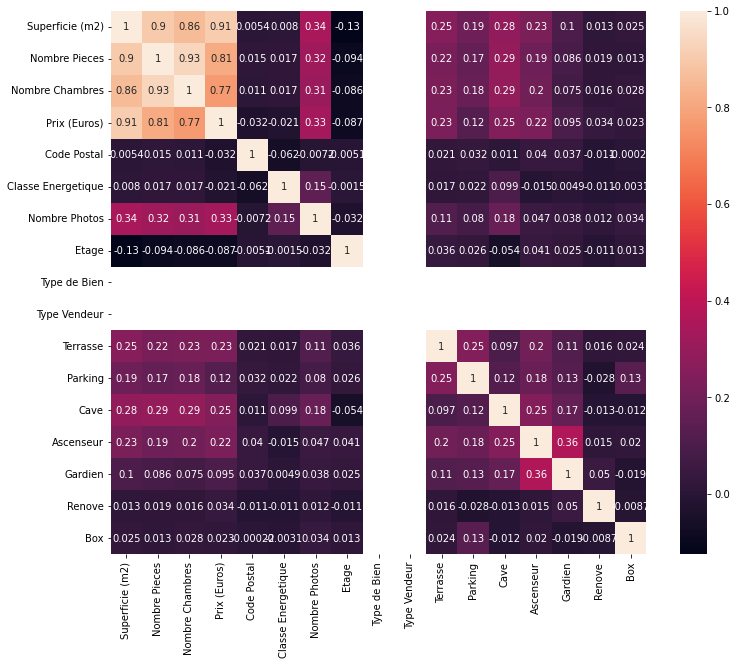

In [371]:
corr = df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [372]:
df_dummies = pd.get_dummies(df)
df_dummies
#Aucun changement => que des données numériques
#Donc aucunes modification à faire pour utiliser le df avec un modèle de régression

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,72,3,2,870000,75016,4,10,2,1,1,-1,-1,1,-1,-1,-1,-1
6971,61,3,2,870000,75002,5,10,7,1,1,-1,-1,1,1,-1,-1,-1
6972,77,2,1,870000,75004,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
6973,95,4,3,870000,75010,0,8,1,1,1,-1,-1,1,-1,-1,1,-1


## Modélisation

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [374]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []
mean_error_list = []
r2_list = []
max_error_list = []
variance_list = []
percentage_error_list = []

# Modèles  :

### 1) Regression linéaire 

In [375]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.8147330088475431

In [376]:
cross_val_score(model_lin_reg, X, y, cv=3)

array([0.78314717, 0.86179388, 0.64195325])

In [377]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True])

In [378]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  96629.23050677891
RMSE :  151995.11358942607
median absolut error :  60908.42603459954
R2 score :  0.8147330088475431
Max error :  1288002.1652679592
Explained variance :  0.8149546976300578
mean abs percentage error :  0.18785440098831122


In [379]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Regression \nLineaire")

<function matplotlib.pyplot.show(close=None, block=None)>

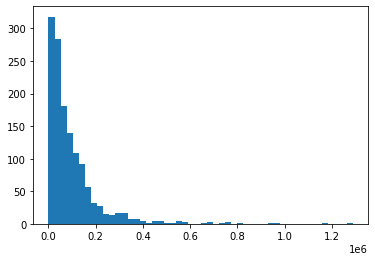

In [380]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [381]:
cross_val_score(model_lin_reg, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -93297.11649133, -106566.68174776, -103524.07474099])

### 2) Lasso CV

In [382]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8126765661321824

In [383]:
cross_val_score(model_lasso_cv, X, y, cv=3)

array([0.77627143, 0.86424564, 0.64685263])

In [384]:
lasso_selector = SelectFromModel(LassoCV(cv=3),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [385]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  96346.64406745162
RMSE :  152836.3499371703
median absolut error :  60080.67245621979
R2 score :  0.8126765661321824
Max error :  1227529.5642710626
Explained variance :  0.8129248022543568
mean abs percentage error :  0.181744186353266


In [386]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Lasso CV")

<function matplotlib.pyplot.show(close=None, block=None)>

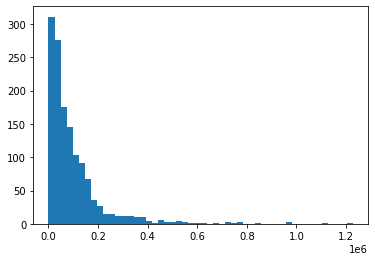

In [387]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [388]:
cross_val_score(model_lasso_cv, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -94182.16078054, -104281.53378348, -103513.10035115])

### 3) Ridge

In [389]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8147331386598744

In [390]:
cross_val_score(model_ridge, X, y, cv=3)

array([0.783143  , 0.86180549, 0.64202327])

In [391]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True])

In [392]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  96626.66529033153
RMSE :  151995.06033967185
median absolut error :  60930.46786276996
R2 score :  0.8147331386598744
Max error :  1287996.141413644
Explained variance :  0.8149549659376094
mean abs percentage error :  0.18784710693409726


In [393]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Ridge")

<function matplotlib.pyplot.show(close=None, block=None)>

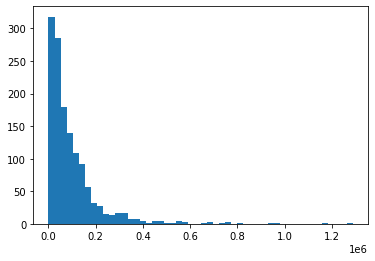

In [394]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [395]:
cross_val_score(model_ridge, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -93298.0732522 , -106560.58305667, -103512.00291189])

### 4) SVR

In [396]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### 5) SGDClassifier

In [397]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### 6) LogisticRegression

In [398]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### 7) BayesianRidge

In [399]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.8147956115259968

In [400]:
cross_val_score(model_bayesian, X, y, cv=3)

array([0.78270135, 0.86221281, 0.64539591])

In [401]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False])

In [402]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  96483.55815098272
RMSE :  151969.43145059323
median absolut error :  60174.46778769791
R2 score :  0.8147956115259968
Max error :  1285598.7366791368
Explained variance :  0.8150206469402799
mean abs percentage error :  0.18728742121537356


In [403]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Bayesian \nRidge")

<function matplotlib.pyplot.show(close=None, block=None)>

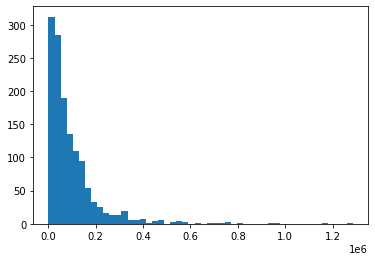

In [404]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [405]:
cross_val_score(model_bayesian, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -93294.38706138, -106303.65567299, -103035.46876991])

### 8) TweedieRegressor

In [406]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.8120485606509183

In [407]:
cross_val_score(model_tweedie, X, y, cv=3)

array([0.77691066, 0.8629859 , 0.64546017])

In [408]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True, False])

In [409]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  97140.34241960057
RMSE :  153092.32900141148
median absolut error :  62202.97061789874
R2 score :  0.8120485606509183
Max error :  1247304.9821031122
Explained variance :  0.8122622618765758
mean abs percentage error :  0.1851008522468075


In [410]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Tweedie \nRegressor")

<function matplotlib.pyplot.show(close=None, block=None)>

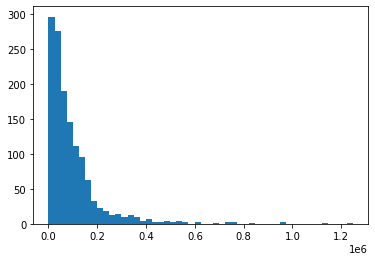

In [411]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [412]:
cross_val_score(model_tweedie, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -94364.08369937, -105078.49060138, -103615.0680507 ])

### 9) Elastic Net

In [413]:
model_elastic = ElasticNet(alpha=0.01)
model_elastic.fit(X_train, y_train)
score_elastic = model_elastic.score(X_test, y_test)
score_list.append(score_elastic)
score_elastic

0.8147411993625187

In [414]:
cross_val_score(model_elastic, X, y, cv=3)

array([0.78307754, 0.86197058, 0.64324049])

In [415]:
selector_elastic = SelectFromModel(ElasticNet(alpha=0.01),threshold='mean')
selector_elastic.fit_transform(X,y)
selector_elastic.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True])

In [416]:
y_pred = model_elastic.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  96587.32477791209
RMSE :  151991.75375720274
median absolut error :  60649.9208201319
R2 score :  0.8147411993625187
Max error :  1287654.5716193914
Explained variance :  0.8149649283119176
mean abs percentage error :  0.18771113823946928


In [417]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Elastic \nNet")

<function matplotlib.pyplot.show(close=None, block=None)>

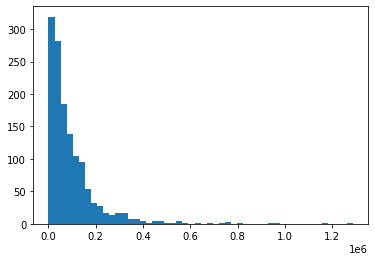

In [418]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [419]:
cross_val_score(model_elastic, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -93306.48569592, -106466.66541509, -103321.21590354])

# Comparaisons des modèles

### Résultats :

#### Accuracy 

Text(0, 0.5, 'Accuracy')

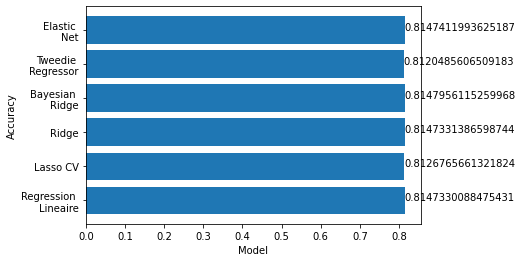

In [420]:
plt.barh(model_list, score_list)
for index, value in enumerate(score_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

#### 1) Mean Error 

Text(0, 0.5, 'Mean error')

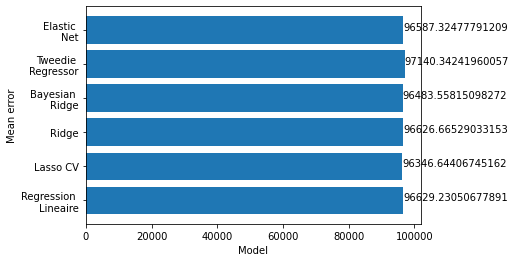

In [421]:
plt.barh(model_list, mean_error_list)
for index, value in enumerate(mean_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean error')

#### 2) Mean Absolute Error using MAE

Text(0, 0.5, 'MAE')

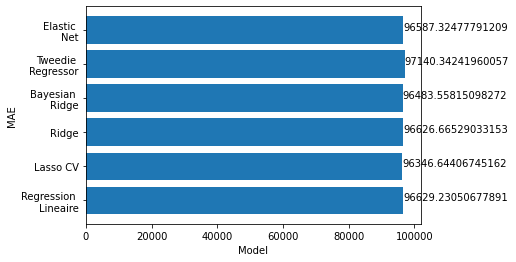

In [422]:
plt.barh(model_list, MAE_list)
for index, value in enumerate(MAE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('MAE')

#### 3) Root Mean Square Error (RMSE)

Text(0, 0.5, 'RMSE')

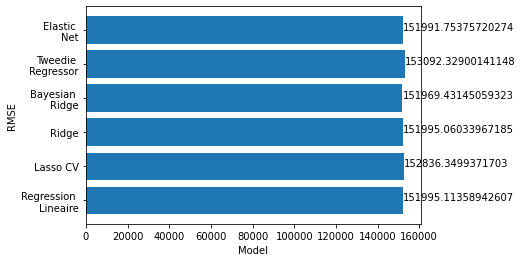

In [423]:
plt.barh(model_list, RMSE_list)
for index, value in enumerate(RMSE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('RMSE')

#### 4) Median Absolute Error

Text(0, 0.5, 'Median Abs Error')

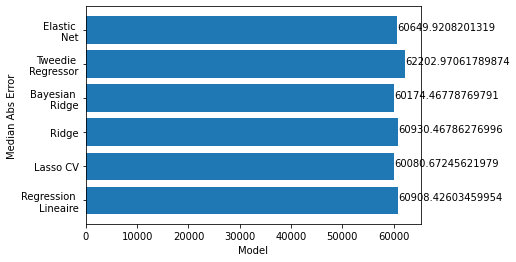

In [424]:
plt.barh(model_list, median_abs_err_list)
for index, value in enumerate(median_abs_err_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Median Abs Error')

#### 5) R2 Score (coeficient of determination)

Text(0, 0.5, 'r2 score')

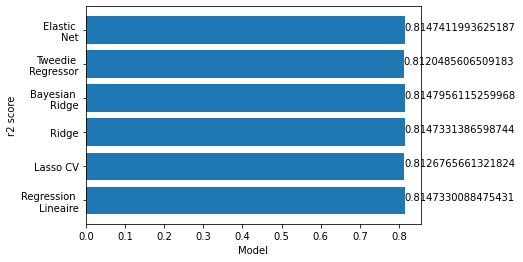

In [425]:
plt.barh(model_list, r2_list)
for index, value in enumerate(r2_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('r2 score')

#### 6) Maximum Error 

Text(0, 0.5, 'Max Error')

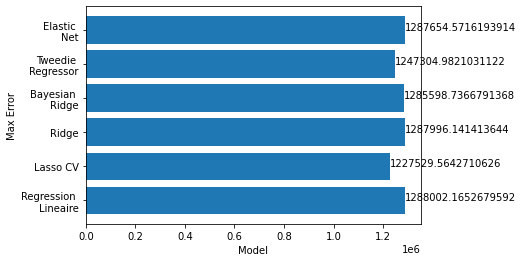

In [426]:
plt.barh(model_list, max_error_list)
for index, value in enumerate(max_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Max Error')

#### 7) Explained Variance Score 

Text(0, 0.5, 'Explained Variance Score')

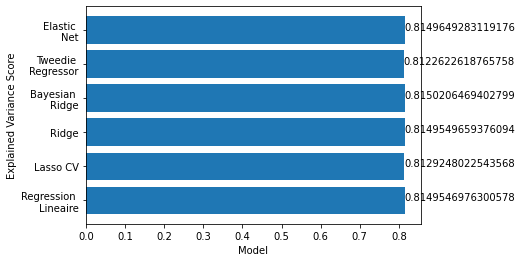

In [427]:
plt.barh(model_list, variance_list)
for index, value in enumerate(variance_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Explained Variance Score')

#### 8) Mean Absolute Percentage Error

Text(0, 0.5, 'Mean Abs Percentage Error')

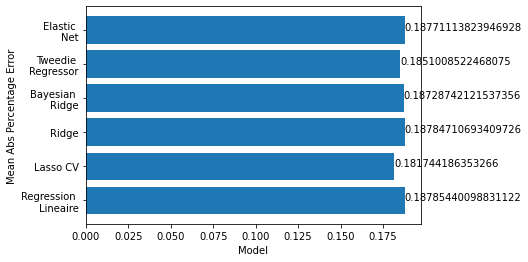

In [428]:
plt.barh(model_list, percentage_error_list)
for index, value in enumerate(percentage_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean Abs Percentage Error')

### Features : 

In [429]:
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [430]:
df[['Code Postal','Prix (Euros)', 'Superficie (m2)']]

,Code Postal,Prix (Euros),Superficie (m2)
0,75017,830000,64
1,75015,1470000,122
2,75116,65000,5
3,75015,80000,7
4,75006,87000,8
...,...,...,...
6970,75016,870000,72
6971,75002,870000,61
6972,75004,870000,77
6973,75010,870000,95


In [431]:
print(df["Code Postal"].value_counts())
print(df.groupby('Code Postal')['Prix (Euros)'].mean())

75018    799
75015    783
75017    550
75019    471
75020    468
75016    463
75011    458
75014    390
75010    373
75013    353
75012    314
75009    214
75007    169
75005    161
75006    154
75008    140
75003    126
75004    122
75002    104
75116     81
75001     58
Name: Code Postal, dtype: int64
Code Postal
75001    658460.344828
75002    490755.769231
75003    758653.174603
75004    670659.672131
75005    599013.664596
75006    684374.415584
75007    757965.088757
75008    772147.785714
75009    642550.467290
75010    558503.428954
75011    562328.598253
75012    546952.792994
75013    525179.164306
75014    581242.923077
75015    590033.358876
75016    649078.656587
75017    531220.509091
75018    447111.443054
75019    514226.326964
75020    498593.367521
75116    656995.061728
Name: Prix (Euros), dtype: float64


In [432]:
print(df["Superficie (m2)"].value_counts())
print(df.groupby('Superficie (m2)')['Prix (Euros)'].mean())

38     151
42     136
36     126
18     122
43     121
      ... 
159      1
147      1
164      1
229      1
180      1
Name: Superficie (m2), Length: 167, dtype: int64
Superficie (m2)
0      3.669475e+05
5      6.220833e+04
6      6.961028e+04
7      8.612788e+04
8      8.968505e+04
           ...     
177    1.670000e+06
180    9.800000e+05
188    1.990000e+06
229    1.360000e+06
237    1.350000e+06
Name: Prix (Euros), Length: 167, dtype: float64


In [433]:
print(df["Nombre Pieces"].value_counts())
print(df.groupby('Nombre Pieces')['Prix (Euros)'].mean())

2    2082
1    1835
3    1704
4     807
5     261
6      52
7      10
Name: Nombre Pieces, dtype: int64
Nombre Pieces
1    2.320539e+05
2    4.678232e+05
3    7.458648e+05
4    9.355801e+05
5    1.200701e+06
6    1.533481e+06
7    1.363600e+06
Name: Prix (Euros), dtype: float64


In [434]:
print(df["Nombre Chambres"].value_counts())
print(df.groupby('Nombre Chambres')['Prix (Euros)'].mean())

1    2357
0    1848
2    1813
3     596
4     128
5       9
Name: Nombre Chambres, dtype: int64
Nombre Chambres
0    2.360274e+05
1    5.032077e+05
2    7.941405e+05
3    9.873794e+05
4    1.328208e+06
5    1.338778e+06
Name: Prix (Euros), dtype: float64


In [435]:
print(df["Classe Energetique"].value_counts())
print(df.groupby('Classe Energetique')['Prix (Euros)'].mean())

0    2156
5    1402
4    1397
6     661
7     658
3     366
2      76
1      35
Name: Classe Energetique, dtype: int64
Classe Energetique
0    507960.414193
1    565255.714286
2    800668.368421
3    757879.103825
4    728533.251253
5    590198.255350
6    454747.261725
7    354963.113982
Name: Prix (Euros), dtype: float64


In [436]:
print(df["Nombre Photos"].value_counts())
print(df.groupby('Nombre Photos')['Prix (Euros)'].mean())

10    2528
8      710
9      710
6      663
7      637
5      503
4      409
3      250
1      207
2      108
0       26
Name: Nombre Photos, dtype: int64
Nombre Photos
0     386136.153846
1     533116.855072
2     441810.222222
3     354957.792000
4     371713.706601
5     392989.568588
6     445513.719457
7     465356.816327
8     543466.633803
9     606333.314085
10    719079.721123
Name: Prix (Euros), dtype: float64


In [437]:
print(df["Etage"].value_counts())
print(df.groupby('Etage')['Prix (Euros)'].mean())

 1    1277
-1    1164
 2    1081
 3     948
 4     705
 6     610
 5     536
 7     285
 8     109
 9      36
Name: Etage, dtype: int64
Etage
-1    526622.327320
 1    603953.592796
 2    623372.032377
 3    654266.207806
 4    604173.974468
 5    577756.776119
 6    396273.722951
 7    327374.533333
 8    563143.027523
 9    615985.555556
Name: Prix (Euros), dtype: float64


In [438]:
print(df["Terrasse"].value_counts())
print(df.groupby('Terrasse')['Prix (Euros)'].mean())

-1    5474
 1    1277
Name: Terrasse, dtype: int64
Terrasse
-1    529539.036536
 1    731289.772905
Name: Prix (Euros), dtype: float64


In [439]:
print(df["Parking"].value_counts())
print(df.groupby('Parking')['Prix (Euros)'].mean())

-1    6264
 1     487
Name: Parking, dtype: int64
Parking
-1    555737.339719
 1    721591.437372
Name: Prix (Euros), dtype: float64


In [440]:
print(df["Cave"].value_counts())
print(df.groupby('Cave')['Prix (Euros)'].mean())

-1    3403
 1    3348
Name: Cave, dtype: int64
Cave
-1    482151.315604
 1    654657.347372
Name: Prix (Euros), dtype: float64


In [441]:
print(df["Ascenseur"].value_counts())
print(df.groupby('Ascenseur')['Prix (Euros)'].mean())

-1    4061
 1    2690
Name: Ascenseur, dtype: int64
Ascenseur
-1    503794.690224
 1    664179.735688
Name: Prix (Euros), dtype: float64


In [442]:
print(df["Gardien"].value_counts())
print(df.groupby('Gardien')['Prix (Euros)'].mean())

-1    5286
 1    1465
Name: Gardien, dtype: int64
Gardien
-1    550242.43776
 1    630697.74744
Name: Prix (Euros), dtype: float64


In [443]:
print(df["Renove"].value_counts())
print(df.groupby('Renove')['Prix (Euros)'].mean())

-1    6388
 1     363
Name: Renove, dtype: int64
Renove
-1    564836.965717
 1    618113.468320
Name: Prix (Euros), dtype: float64


In [444]:
print(df["Box"].value_counts())
print(df.groupby('Box')['Prix (Euros)'].mean())

-1    6742
 1       9
Name: Box, dtype: int64
Box
-1    567401.175616
 1    792777.777778
Name: Prix (Euros), dtype: float64
